# Profile



*   Nama: Iva Raudyatuzzahra
*   Email   : ivaraudya@gmail.com



# Image Classification Model

Importing Tensorflow & Version Checking

In [47]:
import tensorflow as tf
print(tf.__version__)

2.5.0


Downloading Dataset from Dicoding Academy

In [9]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-04 13:19:00--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  6.96MB/s    in 1m 45s  

2021-07-04 13:20:46 (2.93 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



Zipfile Extracting

In [10]:
import os
import zipfile

local_zip = '/content/rockpaperscissors.zip'
zip_extract = zipfile.ZipFile(local_zip, 'r')
zip_extract.extractall('/content/')
zip_extract.close()

Directory Checking

In [11]:
os.listdir('/content')

['.config',
 'rockpaperscissors',
 '__MACOSX',
 'rockpaperscissors.zip',
 'sample_data']

In [12]:
os.listdir('/content/rockpaperscissors')

['paper', 'rps-cv-images', 'scissors', 'rock', 'README_rpc-cv-images.txt']

In [13]:
os.listdir('/content/rockpaperscissors/rps-cv-images')

['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']

Data Folder Preparation 

In [14]:
import os

paper_fold=os.path.join('/content/rockpaperscissors/rps-cv-images/paper')
scissors_fold=os.path.join('/content/rockpaperscissors/rps-cv-images/scissors')
rock_fold=os.path.join('/content/rockpaperscissors/rps-cv-images/rock')

print('paper folder contains', len(os.listdir(paper_fold)), 'images')
print('scissors folder contains', len(os.listdir(scissors_fold)), 'images')
print('rock folder contains', len(os.listdir(rock_fold)), 'images')

paper folder contains 712 images
scissors folder contains 750 images
rock folder contains 726 images


Data Preview

Text(0.5, 1.0, 'Rock')

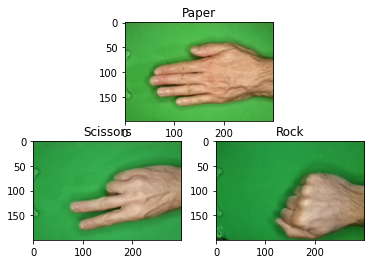

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

paper_preview = mpimg.imread('/content/rockpaperscissors/rps-cv-images/paper/04l5I8TqdzF9WDMJ.png')
scissors_preview = mpimg.imread('/content/rockpaperscissors/scissors/0657zSfiTYzP2jrl.png')
rock_preview = mpimg.imread('/content/rockpaperscissors/rock/00nKV8oHuTGi20gq.png')

fig = plt.figure()
ax = fig.add_subplot(211)
imgplot = plt.imshow(paper_preview)
ax.set_title('Paper')
ax = fig.add_subplot(223)
imgplot = plt.imshow(scissors_preview)
ax.set_title('Scissors')
ax = fig.add_subplot(224)
imgplot = plt.imshow(rock_preview)
ax.set_title('Rock')



Importing Module

In [33]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

Image Augmentation & Data Splitting



In [43]:
basic_dir = ('/content/rockpaperscissors/rps-cv-images')
train_datagen = ImageDataGenerator(
    rotation_range = 40,
    horizontal_flip = True,
    rescale = 1./255,
    shear_range = 0.2,
    height_shift_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.4
)

Data Labelling

In [44]:
train_generator = train_datagen.flow_from_directory(
    basic_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    shuffle=True,
    subset = 'training'
)
validation_generator = train_datagen.flow_from_directory(
    basic_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    shuffle=True,
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Building CNN Architecture

In [48]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

Lost Function & Optimizer

In [49]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

Early Stopping

In [66]:
accuracy_threshold = 98e-2
class callbacks_now(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_accuracy') > 0.95:
      print('Validation accuracy has reach 95%, training has been stopped.')
      self.model.stop_training = True

Training The Model

In [67]:
history = model.fit(
    train_generator,
    steps_per_epoch = 5,
    epochs = 25,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [callbacks_now()]
)

Epoch 1/25
5/5 - 7s - loss: 0.1924 - accuracy: 0.9375 - val_loss: 0.1890 - val_accuracy: 0.9375
Epoch 2/25
5/5 - 7s - loss: 0.2004 - accuracy: 0.9250 - val_loss: 0.2286 - val_accuracy: 0.9250
Epoch 3/25
5/5 - 7s - loss: 0.2419 - accuracy: 0.8875 - val_loss: 0.2843 - val_accuracy: 0.9125
Epoch 4/25
5/5 - 6s - loss: 0.3338 - accuracy: 0.8692 - val_loss: 0.2438 - val_accuracy: 0.9250
Epoch 5/25
5/5 - 7s - loss: 0.1781 - accuracy: 0.9187 - val_loss: 0.2043 - val_accuracy: 0.9250
Epoch 6/25
5/5 - 7s - loss: 0.2272 - accuracy: 0.9187 - val_loss: 0.3248 - val_accuracy: 0.8938
Epoch 7/25
5/5 - 6s - loss: 0.1533 - accuracy: 0.9231 - val_loss: 0.1478 - val_accuracy: 0.9688
Validation accuracy has reach 95%, training has been stopped.


Plotting Training & Validation Accuracy

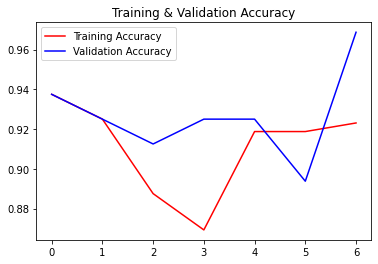

<Figure size 432x288 with 0 Axes>

In [69]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

Classification Simulation

Saving IMG_20210703_215306.jpg to IMG_20210703_215306.jpg
IMG_20210703_215306.jpg
This is Scissors Sign


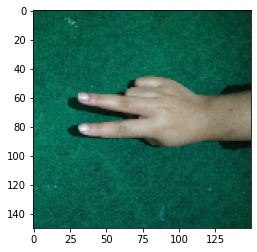

In [70]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():

  path = fn
  image_source = image.load_img(path, target_size = (150, 150))
  image_plot = plt.imshow(image_source)
  x = image.img_to_array(image_source)
  x = np.expand_dims(x, axis = 0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)

  if classes [0, 0] == 1:
    print('This is Rock Sign')
  elif classes [0, 1] == 1:
    print('This is Paper Sign')
  elif classes [0, 2] == 1:
    print('This is Scissors Sign')
  else:
    print('Unknown')